# Support Vector Classification

In [1]:
import sys
sys.path.append("../")
from ortho_lib3_Copy2 import *

## Import and load experiment

In [2]:
data_dir = '../sliced_data'
category = ['Category_1', 'Category_2', 'Category_3', 'Category_4']
exercise = 'AB1.txt'
extype = ['AB', 'AF', 'RF', 'EL']

In [3]:
exercises = Exercises.load("..//Pickle/def_exercises_sliced_transformed_data_all_categories.pickle")

# setting the parameters to differentiate between 3, 4 and 2
exercises = exercises.drop_category(1)
exp = Experiment(exercises, y_condition= lambda y: (y != 'Category_2'))
columns = exp.df.columns.to_numpy()

## Preview dataframe

In [4]:
# quick preview of the dataframe we are working with
print(exp.df)

    angle_left_shoulder_xz_max_AF  angle_left_shoulder_xz_max_RF  \
0                        2.436920                       1.006761   
1                        2.506438                       1.004394   
2                        1.750021                       0.846239   
3                        2.129875                       0.592590   
4                        2.408378                       0.969648   
..                            ...                            ...   
79                       2.420555                       1.532106   
80                       1.201943                       0.428302   
81                       2.186121                       0.580735   
82                       1.882206                       0.808175   
83                       2.602110                       1.114584   

    angle_right_shoulder_xz_max_AF  angle_right_shoulder_xz_max_RF  \
0                         2.854781                        1.492353   
1                         2.430216         

## Run experiments for X and y

In [5]:
X = exp.df.values
y = exp.y

# print(X)
# print(y)

## Import libraries

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

## Applied SKF and get results

In [7]:
# introduce StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

df_scores = pd.DataFrame()

i=1
c_list = []
mean_precision_list = []
mean_recall_list = []
mean_f1_score_list = []
mean_accuracy_list = []

# iterate over different values for hyper parameter C for 0.0001 to 100000

for iterate in range(-4, 5):
    precision_list = []
    recall_list = []
    f1_score_list = []
    accuracy_list=[]
    c = 10 ** iterate
    print(iterate)
    
    for train_index, test_index in skf.split(X, y):
        
        if iterate not in c_list:
            c_list.append(iterate)
        
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]
        regr = svm.LinearSVC(penalty='l2', loss='squared_hinge', C = c)
        regr.fit(Xtrain, ytrain)
        
        ypred = regr.predict(Xtest)
        
        report = classification_report(ytest, ypred.round(), output_dict=True)
        recall = (report.get('weighted avg').get('recall'))
        precision = (report.get('weighted avg').get('precision'))
        f1_score = (report.get('weighted avg').get('f1-score'))
        accuracy = (report.get('accuracy'))
        
        # add results to the list
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)
        accuracy_list.append(accuracy)
        
        i=i+1
        
    # take the mean of the list (needed because of the repetition due to SKF)
    mean_precision_list.append(np.mean(precision_list))
    mean_recall_list.append(np.mean(recall_list))
    mean_f1_score_list.append(np.mean(f1_score_list))
    mean_accuracy_list.append(np.mean(accuracy_list))
    
    df_scores['average'] = df_scores.mean(axis=1)
    df_scores['feature'] = exp.df.columns
    
    # print the values for each hyper parameter
    print(f'precision: {np.mean(precision_list)} \nrecall: {np.mean(recall_list)} \nf1_score: {np.mean(f1_score_list)} \naccuracy: {np.mean(accuracy_list)}')

-4
precision: 0.3840073529411765 
recall: 0.6191176470588236 
f1_score: 0.4738071296894827 
accuracy: 0.6191176470588236
-3
precision: 0.3840073529411765 
recall: 0.6191176470588236 
f1_score: 0.4738071296894827 
accuracy: 0.6191176470588236
-2
precision: 0.5754201680672268 
recall: 0.6205882352941177 
f1_score: 0.5524030501089324 
accuracy: 0.6205882352941177
-1
precision: 0.6049579831932773 
recall: 0.6088235294117647 
f1_score: 0.6028465651995064 
accuracy: 0.6088235294117647
0
precision: 0.6115126050420169 
recall: 0.6088235294117648 
f1_score: 0.6069581398993165 
accuracy: 0.6088235294117648
1
precision: 0.5428921568627451 
recall: 0.5367647058823529 
f1_score: 0.5349028989586265 
accuracy: 0.5367647058823529
2


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in lab

precision: 0.5525515334338864 
recall: 0.5375 
f1_score: 0.5299329137382711 
accuracy: 0.5375
3
precision: 0.5028163992869875 
recall: 0.4889705882352941 
f1_score: 0.4892310544632526 
accuracy: 0.4889705882352941
4
precision: 0.5724490378902143 
recall: 0.549264705882353 
f1_score: 0.52856512661197 
accuracy: 0.549264705882353


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/opt

## Plot figure to visualize optimal hyperparameter (c)

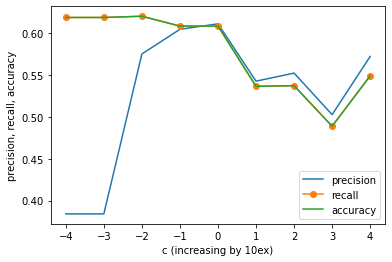

In [8]:
# plot the results (precision, recall and accuracy) for every value of c from 10^-4 to 10^5 in steps of one in the exponent

plt.plot(c_list, mean_precision_list, label='precision')
plt.plot(c_list, mean_recall_list, label='recall', marker='o')
plt.plot(c_list, mean_accuracy_list, label='accuracy')
plt.xlabel('c (increasing by 10ex)')
plt.ylabel('precision, recall, accuracy')
plt.legend()
plt.show()

In [9]:
# create dataframes of the data

dffs_test_1_234 = create_dfframes(['Category_1', 'Category_2', 'Category_3', 'Category_4'], 
                            extype = ['AB', 'AF', 'RF', 'EL'], 
                            data_dir = '../sliced_transformed_testdata', 
                            print_errors=True)
exercises_test_1_234 = dffs_to_exercises(dffs_test_1_234)

exercises_test_2_34 = exercises_test_1_234.drop_category(1)

#exercises_test_2_34.df

In [10]:
# run experiments in the loaded data

exp_test_1_234 = Experiment(exercises_test_1_234, y_condition= lambda y: y != 'Category_1')
columns = exp_test_1_234.df.columns.to_numpy()

exp_test_2_34 = Experiment(exercises_test_2_34, y_condition= lambda y: y != 'Category_2')
columns = exp_test_2_34.df.columns.to_numpy()

# initialise the X test set and y test set

X_test_1_234 = exp_test_1_234.df.values
y_test_1_234 = exp_test_1_234.y

X_test_2_34 = exp_test_2_34.df.values
y_test_2_34 = exp_test_2_34.y

In [13]:
# apply linear SVC on the data, using the optimal hyper parameter (in this case c = 1.0)

regr_2_34 = svm.LinearSVC(penalty='l2', loss='squared_hinge', C = 1, max_iter=1000000)
regr_2_34.fit(X, y)

ypred_2_34 = regr_2_34.predict(X_test_2_34)    
report_2_34 = classification_report(y_test_2_34, ypred_2_34.round(), output_dict=True)

In [14]:
print('accuracy 3, 4 vs 2: ', report_2_34['accuracy'])
print(report_2_34['weighted avg'])

accuracy 3, 4 vs 2:  0.7368421052631579
{'precision': 0.7314439946018894, 'recall': 0.7368421052631579, 'f1-score': 0.7319838056680162, 'support': 19}
